In [ ]:
import numpy as np 
import pandas as pd 
from tqdm import tqdm
from math import sqrt

#plots
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# for vectorization 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# similarity/distance measures
from scipy.spatial import distance
from sklearn.metrics.pairwise import linear_kernel

# sklearn
from sklearn.svm import LinearSVC
from sklearn.exceptions import DataConversionWarning; import warnings
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet, LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import GridSearchCV

In [627]:
# load data
data = pd.read_csv('part2.csv')
data.columns = ['url', 'comments', 'title', 'subtitle', 'body', 'date',
       'proc_title']
data = data[data['title'].notna()]
#data = data.reset_index()

In [628]:
data['x_cat'] = data['url'].str.replace('https://ekstrabladet.dk/nyheder/','')
data['x_cat'] = data['x_cat'].str.replace('https://ekstrabladet.dk/','')
data['x_cat'] = data['x_cat'].apply(lambda x: x.split('/')[0])
data = data[~data.x_cat.str.contains('-')]

In [629]:
n = 100
n2 = n+50
data['x_cat'][n:n2]
for i, cat in enumerate(data['x_cat']):
    if '-' in cat:
        data['x_cat'][i].drop

In [630]:
len(data['body'])

23772

In [655]:
len_title = []
len_body = []
for i in data['title']:
    len_title.append(len(i))
data['len_title'] = pd.DataFrame(data=len_title)

In [656]:
data = data[data['len_title'].notna()]

In [657]:
n = 10
data['comments_cat'] = pd.qcut(data.comments, n, labels=list(range(n)))

In [658]:
len(data[data.comments_cat==2])

2243

In [659]:
data['set'] = 'hi'

In [660]:
n = len(data['set'])
if n%2 !=0:
    n -= 1
n1 = int(n/2)
n

23256

In [661]:
data['set'][:n1] = 'test'
data['set'][n1:n] = 'train'

C:\Users\Jonat\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Jonat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [662]:
df_train = data[data.set=="train"]
df_test = data[data.set=="test"]

In [638]:
n = 150
n2 = n+50
data['proc_title_rm'][n:n2]

KeyError: 'proc_title_rm'

In [639]:
df_test_word = df_test[df_test.proc_title_rm=='dårligt']

AttributeError: 'DataFrame' object has no attribute 'proc_title_rm'

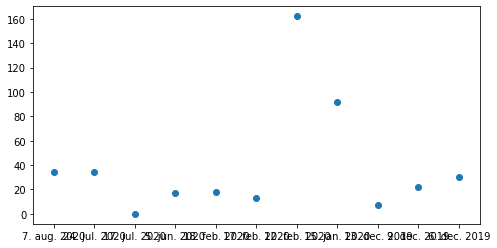

In [640]:
plt.figure(figsize=(8,4))
plt.scatter(df_test_word.date,df_test_word.comments)

In [668]:
vectorizer_test = CountVectorizer()
X = vectorizer.fit_transform(df_train.title.values)

In [669]:
X[]

SyntaxError: invalid syntax (<ipython-input-669-63c3eade6e23>, line 1)

In [ ]:
pd.DataFrame.sparse.from_spmatrix(X)

In [670]:
X = data['proc_title_rm']
y = data['comments']
# create test, train and dev
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=1/3, random_state=1)    
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=1/2, random_state=1)

KeyError: 'proc_title_rm'

In [ ]:
X_test_split = [sent.split(' ') for sent in X_test]

In [671]:
# Bag of Words

# CountVectorizer has a build-in tokenizer and lowercases by default. Also has an option to remove stopwords.
vectorizer = CountVectorizer()
# However, you can override the default tokenization with your own defined function, like so:
#vectorizer = CountVectorizer(tokenizer=preprocess)

# fit and transform train
X_train_bow = vectorizer.fit_transform(data.proc_title_rm.values)
# Only tranform test: never fitting your vectorizer on the test set (it is cheating). OOV words are handled automatically be sklearn's vectorizer.
X_test_bow = vectorizer.transform(df_test.proc_title_rm.values)

AttributeError: 'DataFrame' object has no attribute 'proc_title_rm'

In [ ]:
print(X_train_bow.shape)
print(len(vectorizer.vocabulary_))
X_train_bow[0]

In [ ]:
X_train_bow[0].toarray()

In [ ]:
def make_ngrams(sentence,n):
    tokens = sentence.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]


In [ ]:
# n=1-5
vectorizer = CountVectorizer(ngram_range=(1,5))

X_train_5gram = vectorizer.fit_transform(df_train.title.values)

In [672]:
print(X_train_5gram.shape)
X_train_5gram[0]

(2826, 54674)


<1x54674 sparse matrix of type '<class 'numpy.int64'>'
	with 35 stored elements in Compressed Sparse Row format>

In [673]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(df_train.title.values)

In [674]:
X_train_tfidf[1]

<1x14386 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [675]:
distance.cosine(X_train_tfidf[0].toarray(), X_train_tfidf[1].toarray())

1.0

In [676]:
X_train

1382                      champions
2993    usas coronadødsfald overgår
2283                            jeg
760                   coronatilfæld
3034                         jubler
                   ...             
4912                          brudt
1014                         solgte
5299                            jeg
5362                   bundesligaen
3583                      tidligere
Name: proc_title_rm, Length: 1911, dtype: object

In [677]:
# https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
cosine_similarities = linear_kernel(X_train_tfidf[0], X_train_tfidf).flatten()

indices = cosine_similarities.argsort()[::-1] # in descending order 
print("most similar:",indices[:10])
print("least similar", indices[-9:])

most similar: [    0  5922  6355  3451 10396  6098  9526  3767  9272  1029]
least similar [7602 7601 7600 7599 7598 7597 7596 7594 5813]


In [678]:
print(df_train.title.values[0])
print()
print("most similar: ", df_train.title.values[1719])
print()
print("least similar: ", df_train.title.values[7237])

Rørende afsked med ikon

most similar:  Revyerne er reddet: - Men vi savner stadig svar

least similar:  Husker du denne Lidl-reklame? Nu er den ulovlig


In [679]:
data['proc_title_rm']

KeyError: 'proc_title_rm'

In [680]:
data_value_count = data['title'].str.split(expand=True).stack().value_counts().reset_index()

In [681]:
list(data_value_count['index'][:20])

['i',
 'er',
 '-',
 'på',
 'til',
 'for',
 'med',
 'af',
 'og',
 'at',
 'om',
 'ikke',
 'Det',
 'Nu',
 'efter',
 'har',
 'en',
 'kan',
 'det',
 'fra']

In [682]:
data_split = [sent.split(' ') for sent in data['title']]

In [683]:
data_split[:10]

[['Statsministeren', 'åbner', 'for', 'muligt', 'påbud', 'om', 'mundbind'],
 ['Mette', 'F.', 'afviser', 'at', 'åbne', 'for', 'nattelivet', 'i', 'august'],
 ['Dårligt', 'nyt', 'til', "'Venner'-fans"],
 ['Flemming', 'dødtræt', 'af', 'Elgiganten:', 'Gør', 'det', 'aldrig!'],
 ['Venstre',
  'vil',
  'have',
  'håndtrykket',
  'tilbage,',
  'hvis',
  'det',
  'kan',
  'lade',
  'sig',
  'gøre'],
 ['Bizar',
  'opladning:',
  'Derfor',
  'smører',
  'han',
  'sig',
  'ind',
  'i',
  'babyolie'],
 ['Når', 'du', 'ikke', 'betaler', 'regningen'],
 ['Nye', 'coronatiltag:', '-', 'Føles', 'grænseoverskridende'],
 ['Så', 'farlige', 'er', 'hestehuller'],
 ['Årets', 'bedste', 'for', 'Lundgaard:', '-', 'Undskyld,', 'gutter']]

# Vector space models

In [684]:
from gensim.models import Word2Vec

# using the train_sents from earlier (the lowercased and tokenized sentences)
model = Word2Vec(data_split, size=100, min_count = 0, workers = 2) 

In [685]:
print(model.wv['sådan'])

[-0.01054133 -0.0044615  -0.05636168  0.03468385  0.06775219  0.0055357
 -0.06000087 -0.07791593 -0.01922082 -0.03997782 -0.06331889 -0.05674723
 -0.03509985  0.02292344 -0.02394526  0.11597325  0.02035123 -0.10311953
 -0.04201432 -0.00803341  0.03720836  0.01538436  0.00818798 -0.05031705
 -0.03529516  0.09800793  0.12814486  0.02589547  0.0179689   0.00471374
  0.02546568 -0.14671087 -0.00293754 -0.04643311  0.00812994 -0.03951875
  0.01347651 -0.07800151  0.10821281  0.01973797  0.10727454 -0.0165603
 -0.02668302  0.04114676 -0.10496113 -0.12362413 -0.02755602 -0.09236064
 -0.19102602 -0.02213251  0.05690479 -0.02000421 -0.08525652 -0.06693043
  0.05898207  0.03436293 -0.02347907 -0.01229378  0.05980091  0.07329234
  0.08564367 -0.03137975 -0.12080514 -0.01347284  0.0996859  -0.07398664
 -0.03910568 -0.05958392  0.09107379 -0.06654227  0.06476263 -0.11874023
  0.03623845  0.05774308  0.07441195 -0.08495902 -0.01561237 -0.07029305
 -0.20367889 -0.05552676 -0.03027535 -0.02921897  0.1

In [692]:
for i, word in enumerate(model.wv.vocab):
    if i == 100:
        break
    print(word)

Statsministeren
åbner
for
muligt
påbud
om
mundbind
Mette
F.
afviser
at
åbne
nattelivet
i
august
Dårligt
nyt
til
'Venner'-fans
Flemming
dødtræt
af
Elgiganten:
Gør
det
aldrig!
Venstre
vil
have
håndtrykket
tilbage,
hvis
kan
lade
sig
gøre
Bizar
opladning:
Derfor
smører
han
ind
babyolie
Når
du
ikke
betaler
regningen
Nye
coronatiltag:
-
Føles
grænseoverskridende
Så
farlige
er
hestehuller
Årets
bedste
Lundgaard:
Undskyld,
gutter
Toprådgiver
flere
amerikanske
præsidenter
død
Børn
op
12
år
og
visse
ældre
skal
bruge
Feriepengene
udbetales
oktober
Parken
forventer
gigantisk
underskud

Skuespiller
smittet
med
coronavirus:
'Troede
jeg
skulle
dø'
Skoleskibet
Danmark
har
en
elev
coronavirus
Giro-vinder
sejrede


In [687]:
data_value_count['index']

0                        i
1                       er
2                        -
3                       på
4                      til
               ...        
33131          drømmestart
33132      Skrækmodstander
33133        Cup-problemer
33134    Online-værksteder
33135               Fowlds
Name: index, Length: 33136, dtype: object

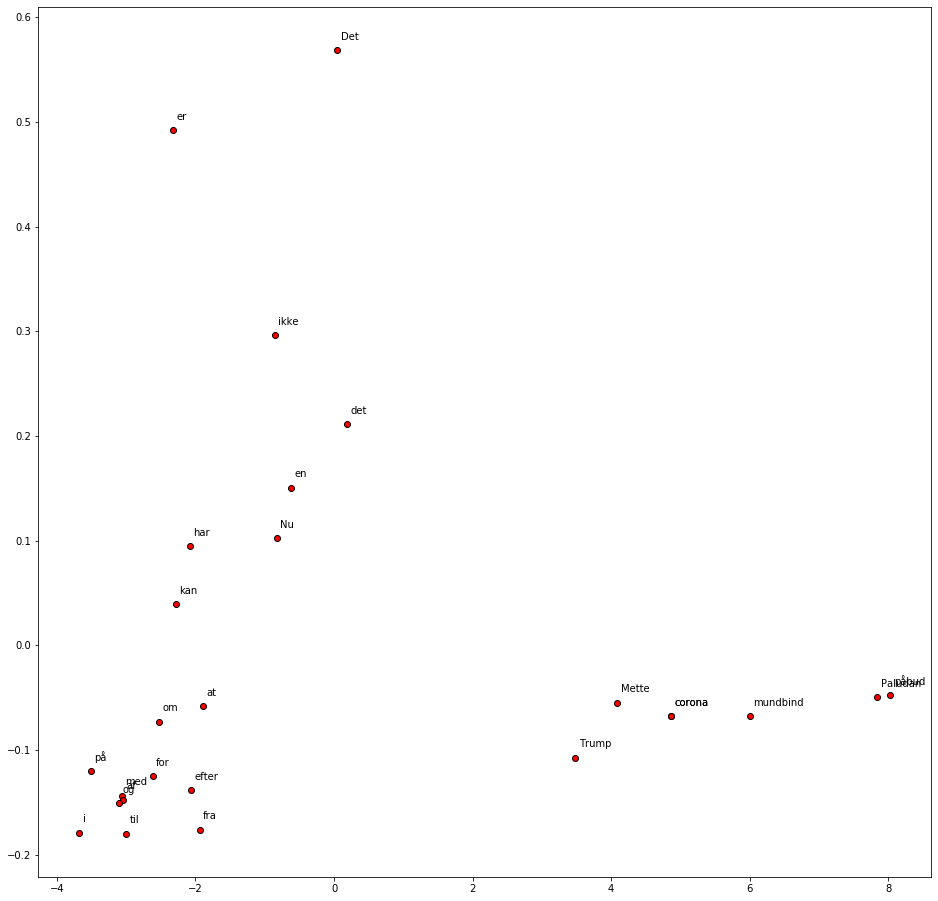

In [703]:
# Reducing the 50-dimensional vectors to 2 dimensions in order to visualise selected words.
from sklearn.decomposition import PCA



words = list(data_value_count['index'][:20])
words.append('corona')
words.remove('-')
words.append('Paludan')
words.append('Mette')
words.append('Trump')
words.append('corona')
words.append('mundbind')
words.append('påbud')

model_list_wv = []
for word in words:
    model_ = model.wv[word]
    model_list_wv.append(model_)
X = model_list_wv
# X = [model.wv['Corona'], model.wv['Tyskland'], 
#      model.wv['Dansk'], model.wv['kroner'],
#      model.wv['Trump'], model.wv['Svensk'], 
#      model.wv['millioner'], model.wv['smittet']]

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

plt.figure(figsize=(16,16))
plt.scatter(X_r[:,0], X_r[:,1], edgecolors='k', c='r')
for word, (x,y) in zip(words, X_r):
    plt.text(x+0.05, y+0.01, word)

# models

### Logistic

In [689]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(random_state=0)),
])

param_grid = {"vect__ngram_range": [(1,1), (1,2), (1,3), (1,4)],
             "tfidf__use_idf": [True, False]
             }

search_log = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=3, verbose=10, n_jobs = 4)

search_log.fit(df_train.x_cat.values, df_train.comments.values)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\Jonat\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
print('Best parameter set: %s ' % search_log.best_params_)
print('Best mse: %s ' % search_log.best_score_)

In [ ]:
train_preds_log = search_log.predict(df_train.x_cat.values)
test_preds_log = search_log.predict(df_test.x_cat.values)
print("training accuracy:", np.mean([(train_preds_log==df_train.comments.values)]))
print("testing accuracy:", np.mean([(test_preds_log==df_test.comments.values)]))

### OLS

In [616]:
pipeline_ols = Pipeline([
    ('vect', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('pol', PolynomialFeatures(include_bias=True)),
    ('clf', LinearRegression()),
])

param_grid_ols = {#"vect__ngram_range": [(1,1), (1,2), (1,3), (1,4)],
             #"tfidf__use_idf": [True, False]
            'pol__degree': [1,2,3]
             }

search_ols = GridSearchCV(pipeline_ols, param_grid_ols, scoring='neg_mean_squared_error', cv=3, verbose=10, n_jobs = 4)

search_ols.fit(df_train.x_cat.values, df_train.comments.values)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0798s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   3 out of   9 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   5 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   6 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [617]:
print('Best parameter set: %s ' % search_ols.best_params_)
print('Best mse: %s ' % search_ols.best_score_)

Best parameter set: {'pol__degree': 2} 
Best mse: -31832.332984533306 


In [ ]:
train_preds_ols = search_ols.predict(df_train.proc_title_rm.values.reshape(-1,1))
test_preds_ols = search_ols.predict(df_test.proc_title_rm.values.reshape(-1,1))
print(f'mse = {mse(df_test.comments.values, test_preds_ols)}')
print("training accuracy:", np.mean([(np.round(train_preds_ols,0)==df_train.comments.values)]))
print("testing accuracy:", np.mean([(np.round(test_preds_ols,0)==df_test.comments.values)]))

In [ ]:
train_preds_ols

### Lasso

In [665]:
pipeline_las = Pipeline([
    #('vect', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('pol', PolynomialFeatures(include_bias=True)),
    ('las', Lasso(random_state=1))
])
lambdas = np.logspace(-4, 4, 10)
pipeline_las.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pol', 'las', 'pol__degree', 'pol__include_bias', 'pol__interaction_only', 'pol__order', 'las__alpha', 'las__copy_X', 'las__fit_intercept', 'las__max_iter', 'las__normalize', 'las__positive', 'las__precompute', 'las__random_state', 'las__selection', 'las__tol', 'las__warm_start'])

In [666]:
param_grid_las = {'pol__degree': [1,2,3],
    'las__alpha': lambdas}

search_las = GridSearchCV(pipeline_las, param_grid_las, scoring='neg_mean_squared_error', cv=3, verbose=10, n_jobs = 4)

#search_las.fit(df_train.x_cat.values, df_train.comments.values)
search_las.fit(df_train.len_title.values.reshape(-1,1), df_train.comments.values)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0120s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0279s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0648s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pol',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('las',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False, random_state=1,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='de

In [667]:
print('Best parameter set: %s ' % search_las.best_params_)
print('Best mse: %s ' % search_las.best_score_)

Best parameter set: {'las__alpha': 166.81005372000558, 'pol__degree': 1} 
Best mse: -38923.45534990493 


In [ ]:
train_preds_las = search_las.predict(df_train.x_cat.values)
test_preds_las = search_las.predict(df_test.x_cat.values)
print("training accuracy:", np.mean([(np.round(train_preds_las,0)==df_train.comments)]))
print("testing accuracy:", np.mean([(np.round(test_preds_las,0)==df_test.comments)]))

In [ ]:
train_preds_las

In [ ]:
np.round(test_preds_las,0)

In [ ]:
test_preds[:100]

### Pol does ~~not~~ work :)

In [ ]:
# scalars
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [641]:
pipeline_pol = Pipeline([
    #('vect', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('pol', PolynomialFeatures(include_bias=True)),
    ('ela', ElasticNet())
    #('stanscal', RobustScaler(with_centering=False))
])
ela__l1_ratio = np.logspace(-1, 1, 10)
pipeline_pol.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pol', 'ela', 'pol__degree', 'pol__include_bias', 'pol__interaction_only', 'pol__order', 'ela__alpha', 'ela__copy_X', 'ela__fit_intercept', 'ela__l1_ratio', 'ela__max_iter', 'ela__normalize', 'ela__positive', 'ela__precompute', 'ela__random_state', 'ela__selection', 'ela__tol', 'ela__warm_start'])

In [663]:
param_grid_pol = {'pol__degree': [1,2,3],
                 'ela__l1_ratio': ela__l1_ratio}

search_pol = GridSearchCV(pipeline_pol, param_grid_pol, scoring='neg_mean_squared_error', cv=3, verbose=10, n_jobs = 4)

#search_pol.fit(df_train.x_cat.values, df_train.comments.values)
search_pol.fit(df_train.len_title.values.reshape(-1,1), df_train.comments.values)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1859s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0180s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  44 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0489s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  68 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    1.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pol',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ela',
                                        ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=1000,
                                                   normalize=False,
                                                   positive=False,
                                                   precompute=False,
                                                   random_state=None,
                       

In [664]:
print('Best parameter set: %s ' % search_pol.best_params_)
print('Best mse: %s ' % search_pol.best_score_)

Best parameter set: {'ela__l1_ratio': 10.0, 'pol__degree': 1} 
Best mse: -38925.416719445995 


In [ ]:
train_preds_pol = search_pol.predict(df_train.proc_title_rm.values)
test_preds_pol = search_pol.predict(df_test.proc_title_rm.values)
print("training accuracy:", np.mean([(np.round(train_preds_pol,0)==df_train.comments)]))
print("testing accuracy:", np.mean([(np.round(test_preds_pol,0)==df_test.comments)]))

In [ ]:
train_preds_pol